# Preparação dos dados para Análise Preditiva

In [1]:
# Conectando ao google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
passageiros = pd.read_csv("/content/drive/MyDrive/Tensorflow/Passageiros.csv")

In [4]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [5]:
passageiros.shape

(144, 2)

In [6]:
passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tempo        144 non-null    float64
 1   passageiros  144 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [7]:
passageiros.describe()

,tempo,passageiros
count,144.000000,144.000000
mean,1954.958333,280.298611
std,3.476109,119.966317
min,1949.000000,104.000000
25%,1951.979167,180.000000
50%,1954.958333,265.500000
75%,1957.937500,360.500000
max,1960.916667,622.000000


In [8]:
import seaborn as sns

In [9]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

<Axes: xlabel='tempo', ylabel='passageiros'>

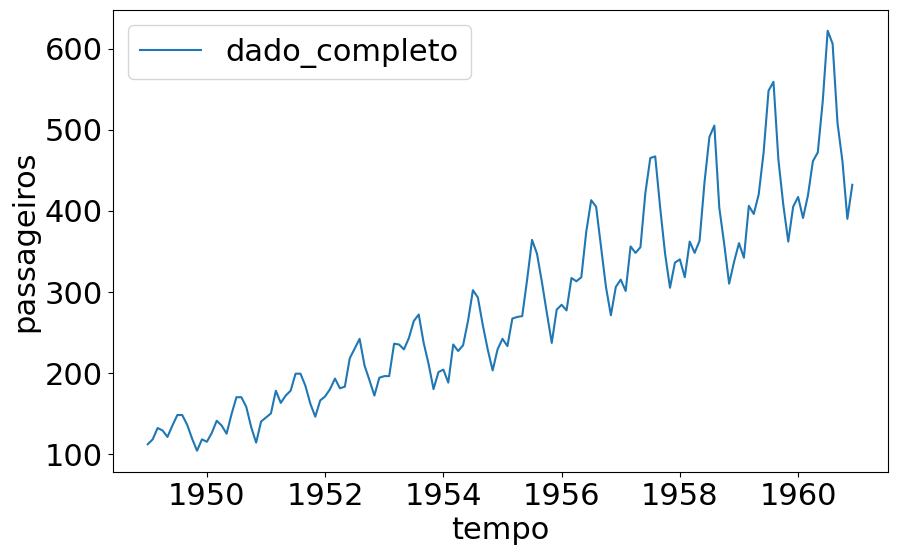

In [10]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

## Escalando os dados

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
sc.fit(passageiros)

StandardScaler()

In [14]:
dado_escalado = sc.transform(passageiros)

In [15]:
x=dado_escalado[:,0] # Feature - Características - Tempo
y=dado_escalado[:,1] # Alvo - Número de passageiros

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

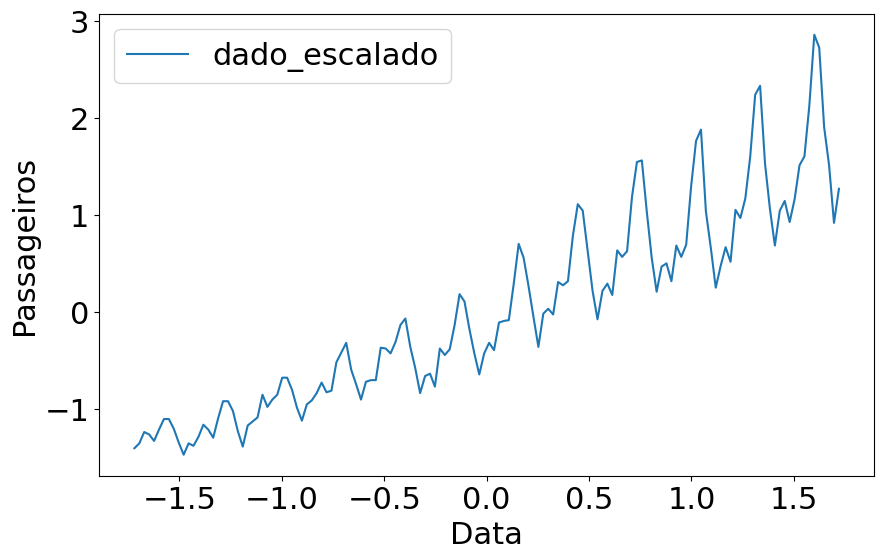

In [17]:
sns.lineplot(x=x, y=y, label='dado_escalado')
plt.ylabel("Passageiros")
plt.xlabel("Data")

## Dividindo dados de treino e teste

In [18]:
tamanho_treino = int(len(passageiros)*0.9) # Pegando 90% dos dados de treino

tamanho_teste = len(passageiros) - tamanho_treino # O resto será reservado para testes

In [19]:
xtreino = x[0:tamanho_treino]

In [20]:
ytreino = y[0:tamanho_treino]

In [21]:
xteste = x[tamanho_treino:len(passageiros)]

In [22]:
yteste = y[tamanho_treino:len(passageiros)]

<Axes: >

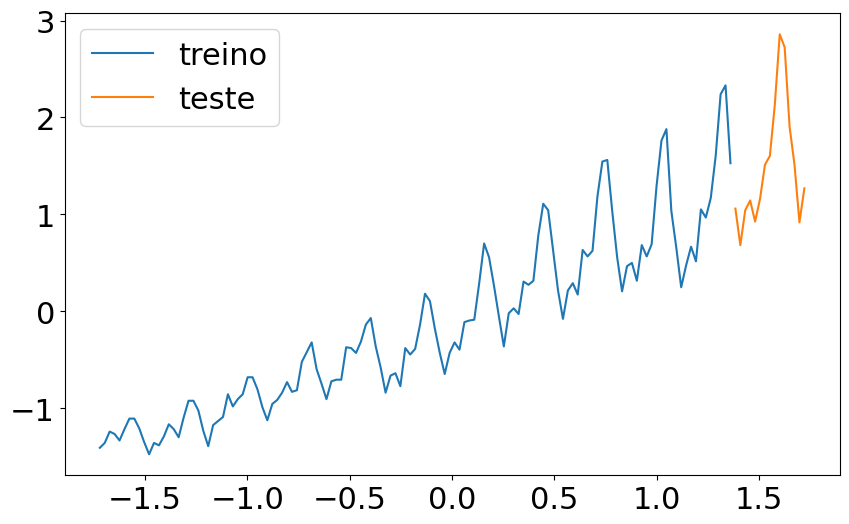

In [23]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')

# Previsão com Regressão Linear

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
regressor = Sequential()

In [26]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones',
                    activation='linear', use_bias=False))

In [27]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 1s 7ms/step - loss: 0.1286


In [30]:
# Prevendo os dados de Treino (o ajuste)
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


<Axes: >

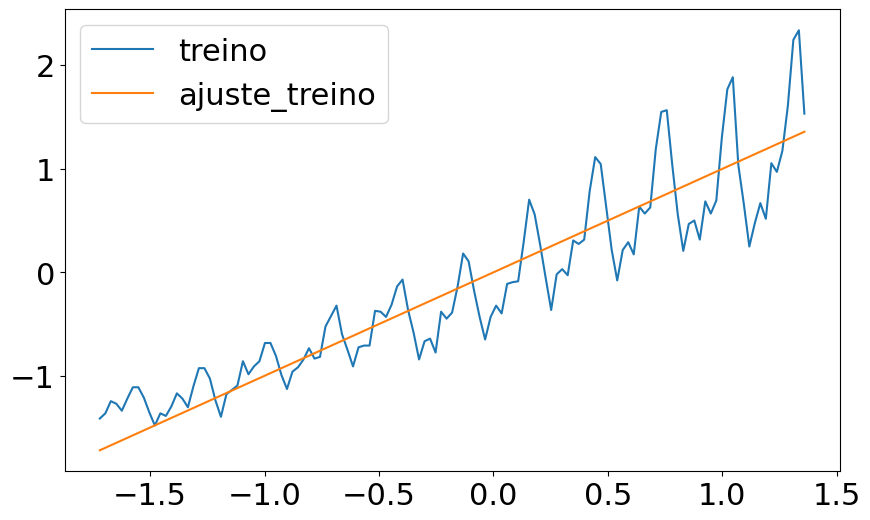

In [31]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [32]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

In [33]:
resultados

,tempo,passageiros
0,-1.720064,-1.713425
1,-1.696007,-1.689461
2,-1.671950,-1.665497
3,-1.647894,-1.641533
4,-1.623837,-1.617569
...,...,...
124,1.262984,1.258109
125,1.287041,1.282073
126,1.311098,1.306037
127,1.335155,1.330001


In [34]:
resultado_transf = sc.inverse_transform(resultados)

In [35]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

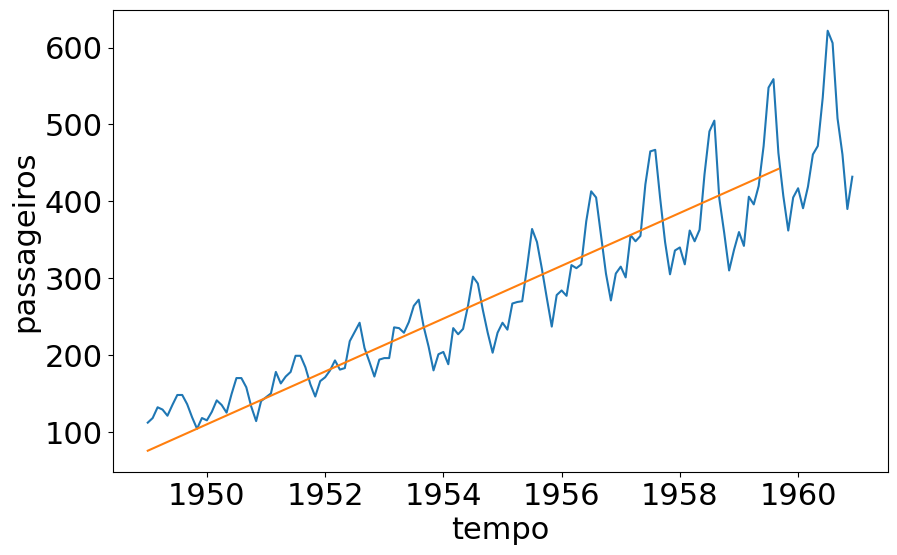

In [36]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)

In [37]:
# Prevendo os dados de teste(o futuro)

y_predict_teste= regressor.predict(xteste)

1/1 [==============================] - 0s 21ms/step


In [38]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [39]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [40]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

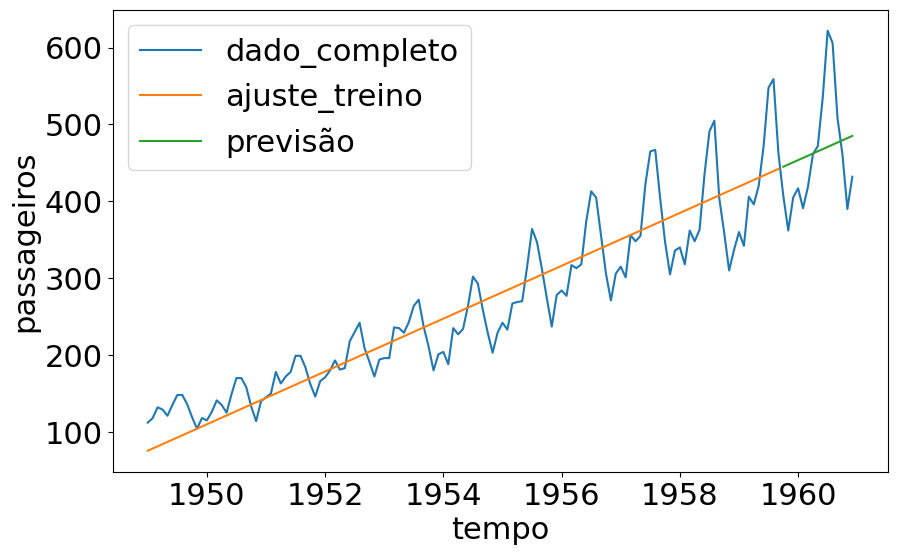

In [41]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros,label='dado_completo')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_teste,label='previsão')

# Regressão não-linear

In [42]:
regressor2 = Sequential()

In [43]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear',use_bias=False))

In [44]:
regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
regressor2.fit(xtreino,ytreino,epochs =500)

Epoch 1/500
5/5 [==============================] - 1s 4ms/step - loss: 0.8127
Epoch 2/500
5/5 [==============================] - 0s 7ms/step - loss: 0.8070
Epoch 3/500
5/5 [==============================] - 0s 6ms/step - loss: 0.8005
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7970
Epoch 5/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7930
Epoch 6/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7902
Epoch 7/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7874
Epoch 8/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7858
Epoch 9/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7842
Epoch 10/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7834
Epoch 11/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7832
Epoch 12/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7833
Epoch 13/500
5/5 [==============================] - 0s 4ms/st

In [46]:
# Prevendo os dados de treino (o ajuste)
y_predict= regressor2.predict(xtreino)

5/5 [==============================] - 0s 3ms/step


In [47]:
# Prevendo os dados de teste(o futuro)
y_predict_teste= regressor2.predict(xteste)

1/1 [==============================] - 0s 21ms/step


<Axes: >

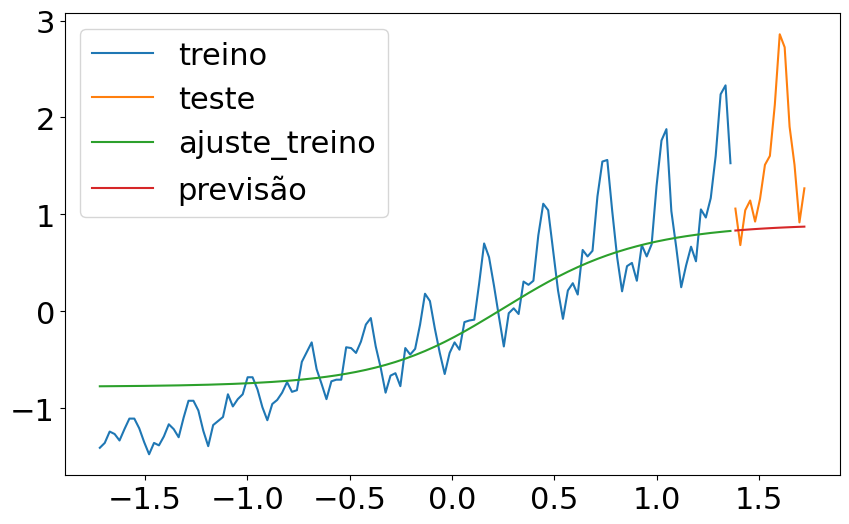

In [48]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

# Alterando a forma como passamos os dados

Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo.

In [49]:
vetor = pd.DataFrame(ytreino)[0]

In [50]:
import numpy as np

In [51]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [52]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [53]:
xtreino_novo[0:5] #X

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [54]:
ytreino_novo[0:5] #y

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

## Separando dados de Treino e Teste

In [55]:
vetor2 = pd.DataFrame(yteste)[0]

In [56]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

# Redes Neurais

In [57]:
regressor3 = Sequential()

In [58]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 1)                 64        
                                                                 
Total params: 584 (2.28 KB)
Trainable params: 584 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 0.7677
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.7417
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7199
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6989
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6775
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6515
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6262
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5981
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5656
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5341
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4975
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 0.4551
Epoch 13/100
4/4 [==============================] - 0s 8ms/

In [60]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 [==============================] - 0s 3ms/step


<Axes: xlabel='tempo', ylabel='0'>

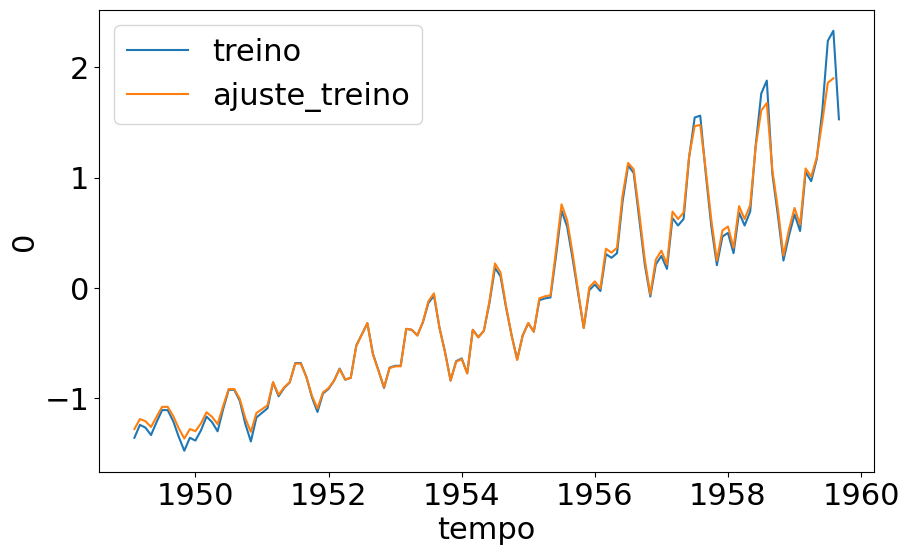

In [61]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [62]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 114ms/step


In [63]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

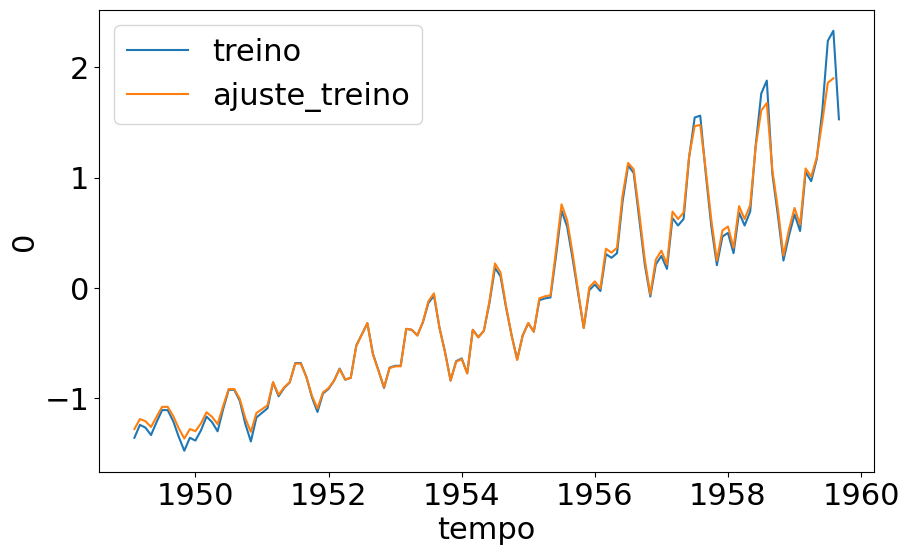

In [64]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

<Axes: xlabel='tempo'>

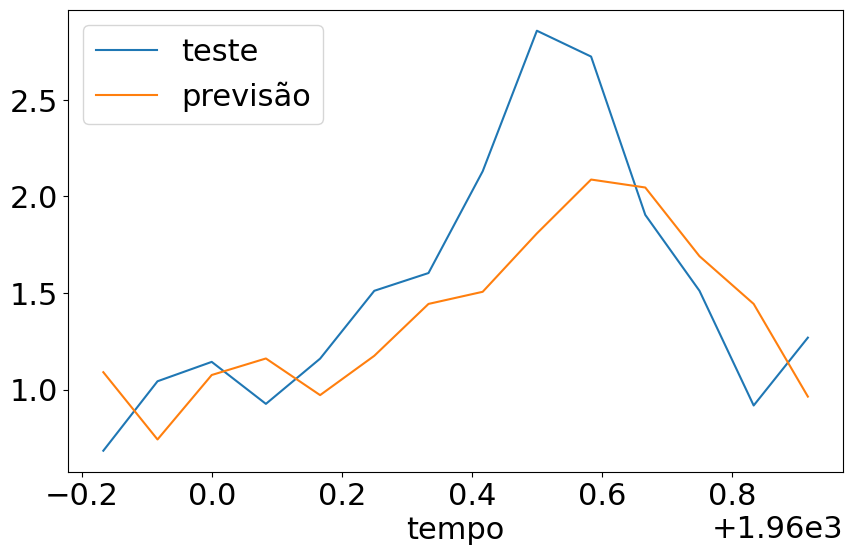

In [65]:
sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

<Axes: xlabel='tempo', ylabel='0'>

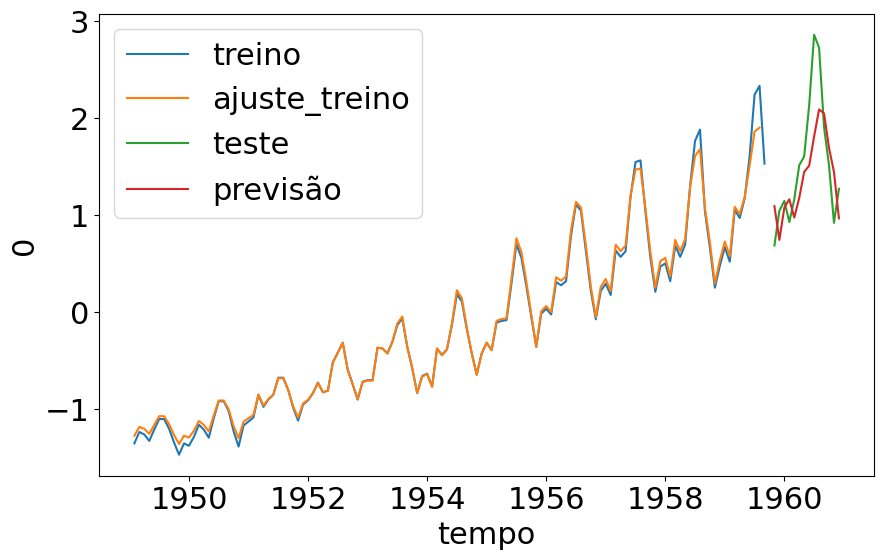

In [66]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

# Janelas

In [67]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [68]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [69]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [70]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [71]:
regressor4 = Sequential()

In [72]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 32        
                                                                 
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
Total params: 608 (2.38 KB)
Trainable params: 608 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
4/4 [==============================] - 1s 4ms/step - loss: 0.7702
Epoch 2/300
4/4 [==============================] - 0s 15ms/step - loss: 0.7599
Epoch 3/300
4/4 [==============================] - 0s 9ms/step - loss: 0.7605
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7589
Epoch 5/300
4/4 [==============================] - 0s 15ms/step - loss: 0.7561
Epoch 6/300
4/4 [==============================] - 0s 10ms/step - loss: 0.7535
Epoch 7/300
4/4 [==============================] - 0s 9ms/step - loss: 0.7501
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7459
Epoch 9/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7399
Epoch 10/300
4/4 [==============================] - 0s 11ms/step - loss: 0.7334
Epoch 11/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7269
Epoch 12/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7180
Epoch 13/300
4/4 [==============================] - 0s 8m

In [74]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 68ms/step


In [75]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

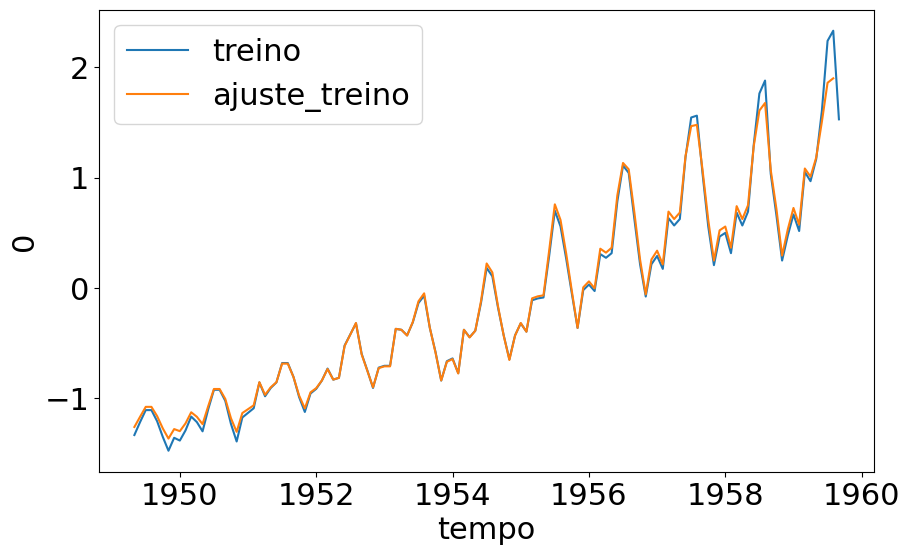

In [76]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

<Axes: xlabel='tempo'>

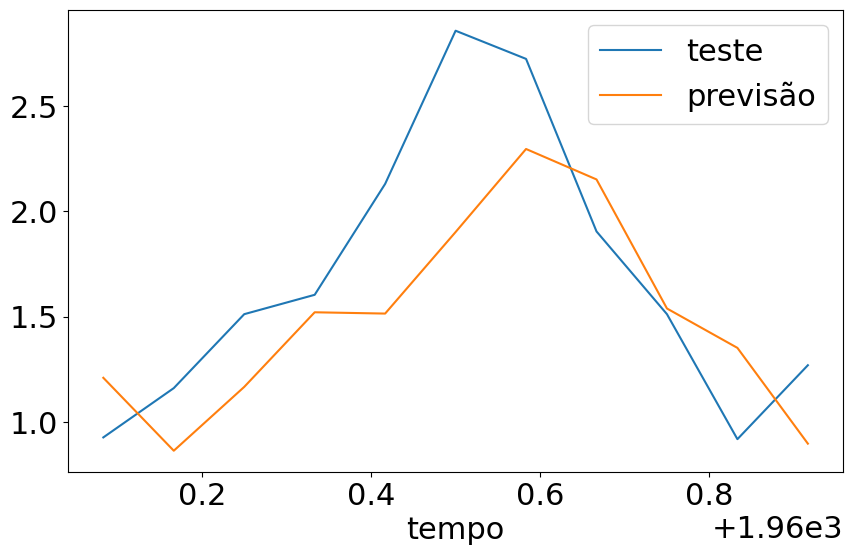

In [77]:
sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

<Axes: xlabel='tempo', ylabel='0'>

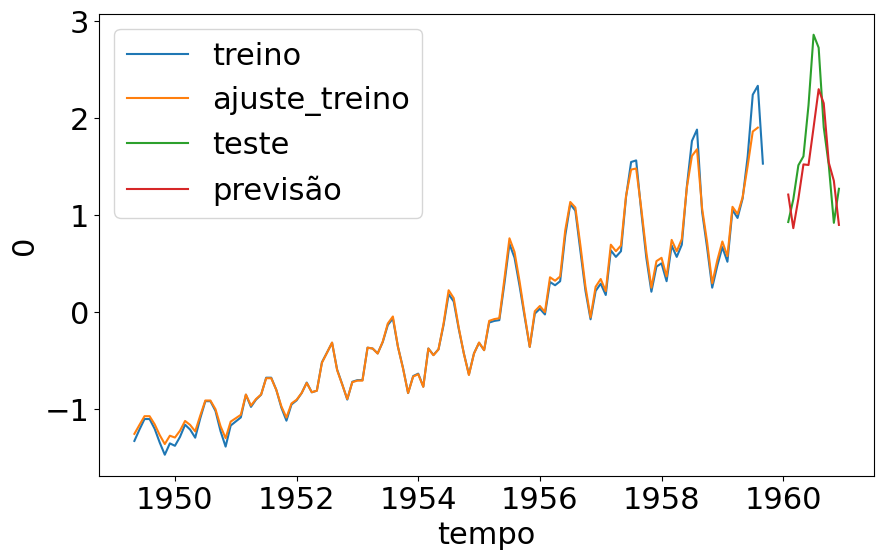

In [78]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

# LSTMs

In [79]:
bike = pd.read_csv("/content/drive/MyDrive/Tensorflow/bicicletas.csv")

In [80]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [81]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

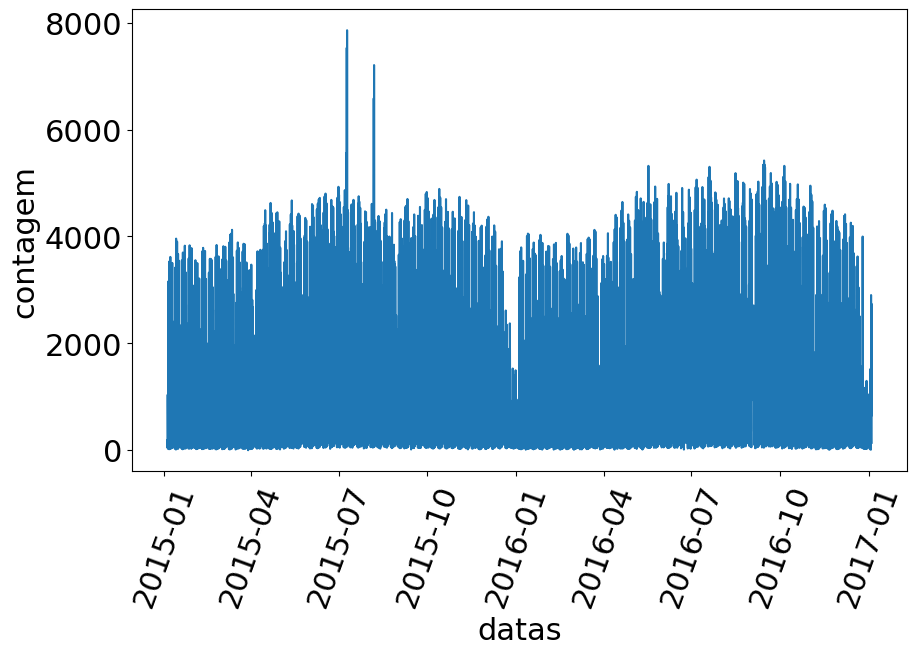

In [82]:
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=70)

## Escalando os dados

In [83]:
sc2 = StandardScaler()

In [84]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [85]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

## Dividindo em dados de Treino e Teste

In [86]:
tamanho_treino = int(len(bike)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(bike)-tamanho_treino #O resto vamos reservar para teste

In [87]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

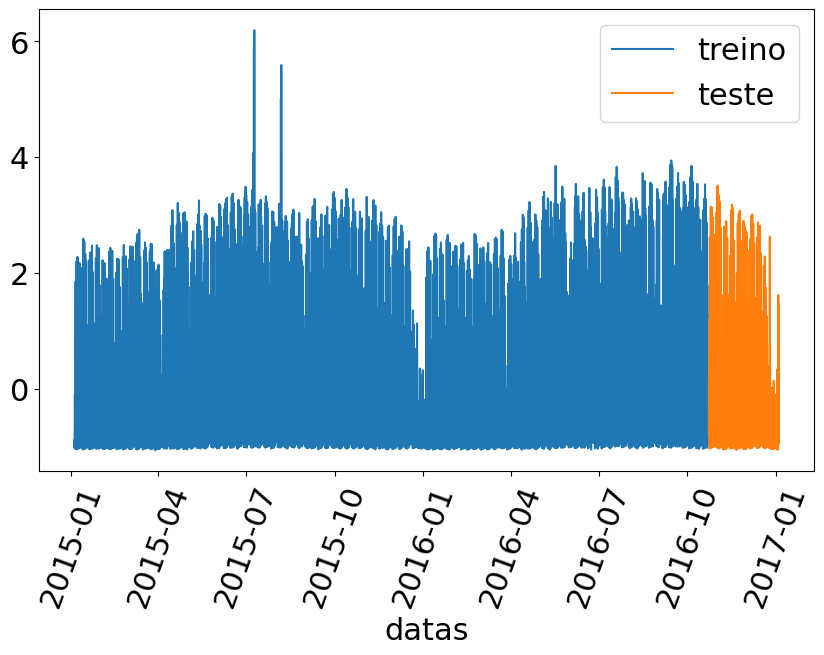

In [88]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
plt.xticks(rotation=70)

In [89]:
vetor = pd.DataFrame(ytreino)[0]

In [90]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [91]:
xtreino_novo[0:5]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [92]:
ytreino_novo[0:5]

array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941])

In [93]:
vetor2 = pd.DataFrame(yteste)[0]

In [94]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

## O que a LSTM espera

A entrada de redes recorrentes deve possuir a seguinte forma para a entrada (número de amostras, número de passos no tempo, e número de atributos por passo no tempo).

In [95]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [96]:
xtreino_novo.shape

(15662, 10, 1)

In [97]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

## Usando a LSTM

In [98]:
from tensorflow.keras.layers import LSTM

In [99]:
recorrente = Sequential()

In [100]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))

In [101]:
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 14s 22ms/step - loss: 0.2857 - val_loss: 0.0879
Epoch 2/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0835 - val_loss: 0.0391
Epoch 3/100
490/490 [==============================] - 15s 31ms/step - loss: 0.0574 - val_loss: 0.0320
Epoch 4/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0491 - val_loss: 0.0509
Epoch 5/100
490/490 [==============================] - 11s 22ms/step - loss: 0.0445 - val_loss: 0.0361
Epoch 6/100
490/490 [==============================] - 11s 23ms/step - loss: 0.0416 - val_loss: 0.0249
Epoch 7/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0394 - val_loss: 0.0316
Epoch 8/100
490/490 [==============================] - 15s 30ms/step - loss: 0.0376 - val_loss: 0.0236
Epoch 9/100
490/490 [==============================] - 12s 24ms/step - loss: 0.0365 - val_loss: 0.0275
Epoch 10/100
490/490 [==============================] - 14s 28ms/step - loss

In [103]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 3s 6ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

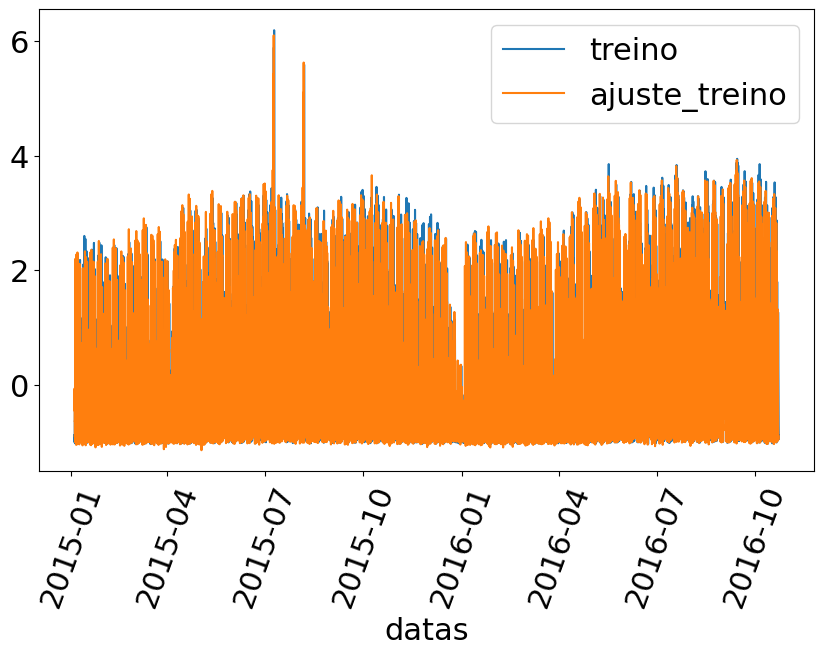

In [104]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70)

In [105]:
y_predito = recorrente.predict(xteste_novo)

55/55 [==============================] - 0s 6ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

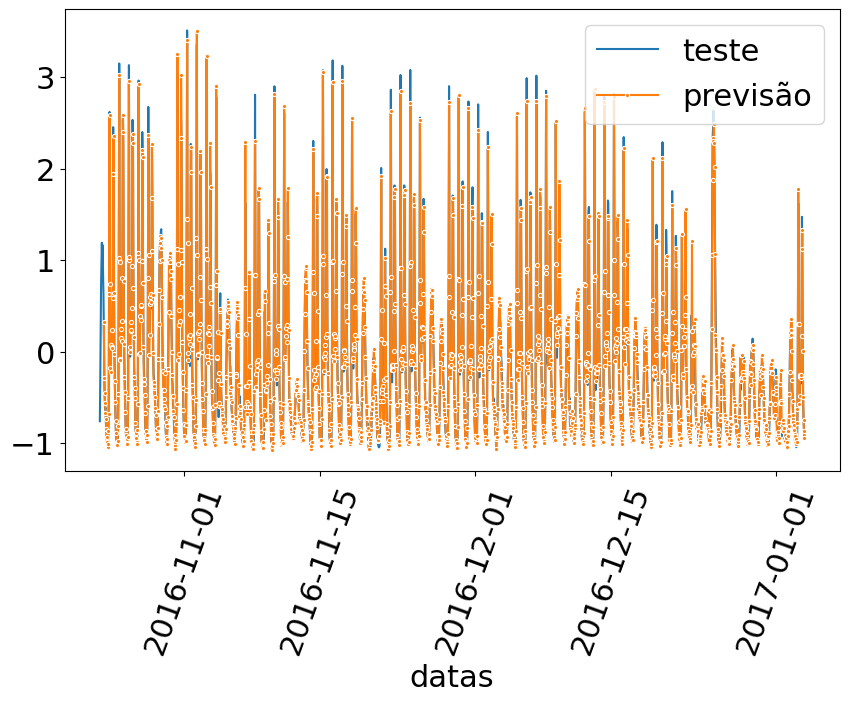

In [106]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70)

## Mais uma tentativa

In [107]:
from tensorflow.keras.layers import GRU

In [108]:
recorrente_g = Sequential()

In [109]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units=1))

In [110]:
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 10s 16ms/step - loss: 0.2313 - val_loss: 0.0816
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0684 - val_loss: 0.0378
Epoch 3/100
490/490 [==============================] - 7s 15ms/step - loss: 0.0510 - val_loss: 0.0407
Epoch 4/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0453 - val_loss: 0.0237
Epoch 5/100
490/490 [==============================] - 7s 15ms/step - loss: 0.0414 - val_loss: 0.0225
Epoch 6/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0380 - val_loss: 0.0236
Epoch 7/100
490/490 [==============================] - 8s 15ms/step - loss: 0.0365 - val_loss: 0.0213
Epoch 8/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0346 - val_loss: 0.0216
Epoch 9/100
490/490 [==============================] - 7s 15ms/step - loss: 0.0333 - val_loss: 0.0204
Epoch 10/100
490/490 [==============================] - 6s 13ms/step - loss: 0.03

In [112]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 1s 5ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

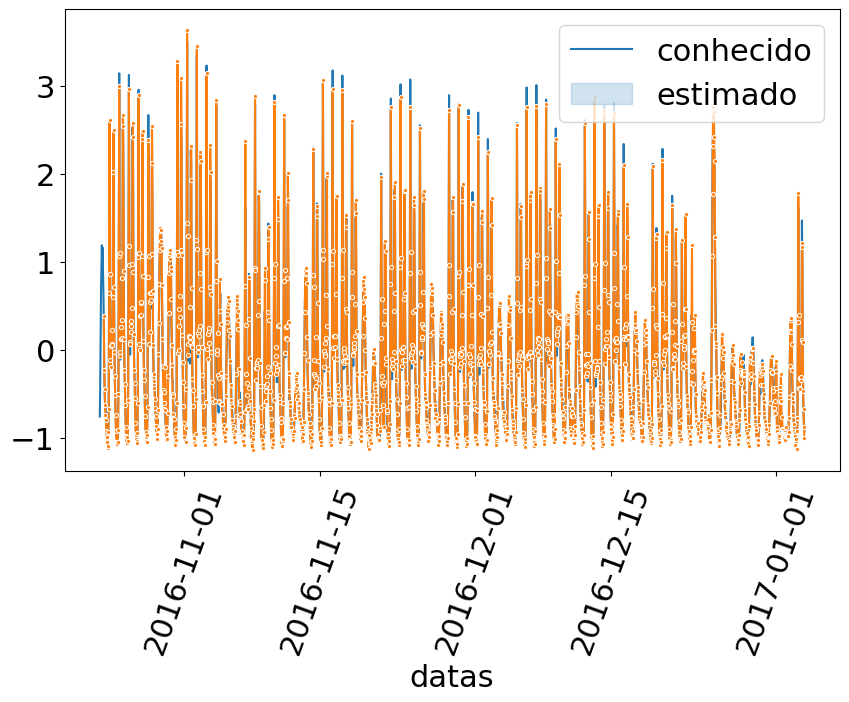

In [113]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70)

In [114]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


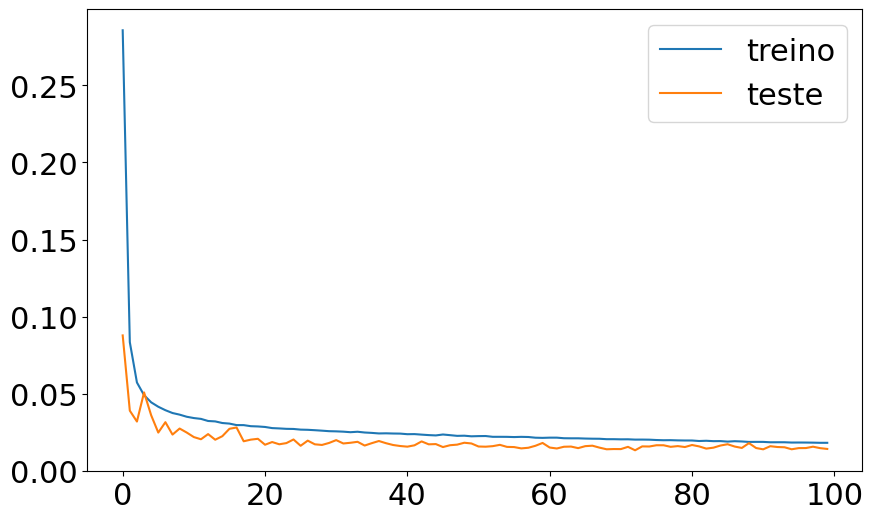

In [115]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

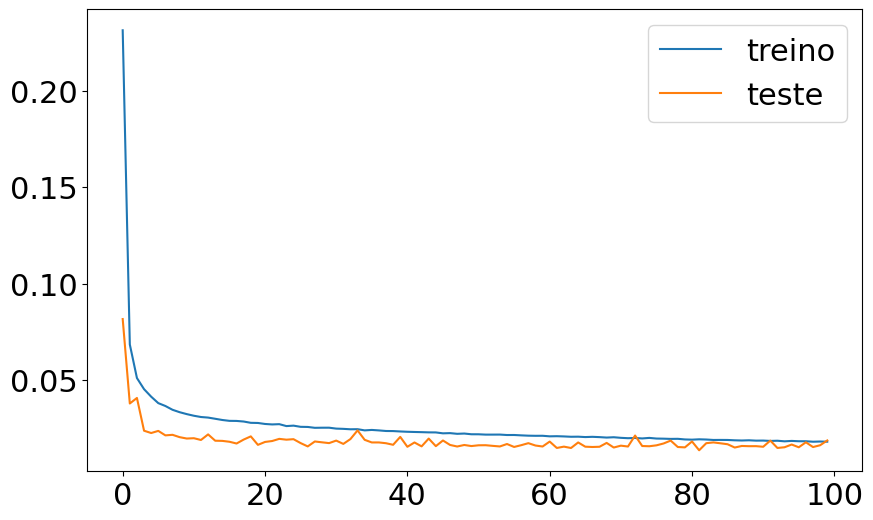

In [116]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])